In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
filename = '../data/worldcitiespop.csv'

In [3]:
df = pd.read_csv(filename, sep=';', usecols=(0,1,6))

In [4]:
df_us = df[df['Country']=='us']
df_gb = df[df['Country']=='gb']
#del df

In [5]:
df_us_long = df_us[df_us['Longitude'].between(-130,-60)]  # Longitude restricted to a more sensible range

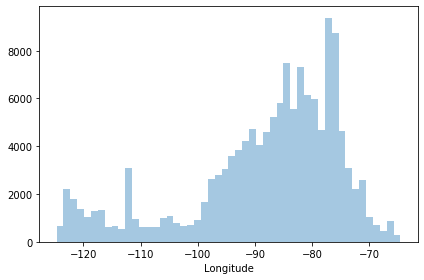

In [36]:
sns.distplot(df_us_long['Longitude'], kde=False)
plt.tight_layout()

In [7]:
from scipy.stats import shapiro
data = df_us_long['Longitude']
stat, p = shapiro(data)
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.903, p=0.000000
Probably not Gaussian


/home/gus/.local/share/virtualenvs/bci_desafio_data_analytics-4PuCjHLk/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [8]:
from scipy.stats import normaltest
data = df_us_long['Longitude']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=18456.912, p=0.000
Probably not Gaussian


In [9]:
from scipy.stats import anderson
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=4396.922
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [10]:
df_gb['City'].shape

(17708,)

In [11]:
df_us['City'].shape

(141982,)

In [12]:
matches = list(set(df_gb['City']) & set(df_us['City']))

In [13]:
df_us.reset_index(inplace=True)

In [14]:
df_us.drop(columns=['index'])

,Country,City,Longitude
0,us,lost creek,-83.325278
1,us,edgewood village,-93.842500
2,us,trout dale,-81.440556
3,us,trivoli,-89.891944
4,us,barhamsville,-76.840556
...,...,...,...
141977,us,woodman,-82.044722
141978,us,fordoche,-91.616389
141979,us,jerusalem mills,-76.401944
141980,us,slemp,-83.111667


In [15]:
indices = []
for i,city in enumerate(df_us['City']):
    if city not in matches:
        indices.append(i)

In [16]:
df_us_gb = df_us.drop(index=indices).reset_index().drop(columns=['index', 'level_0', 'Country'])

In [17]:
df_us_gb

,City,Longitude
0,avon,-94.315556
1,perth,-99.457500
2,linden,-93.133889
3,pool,-80.864444
4,hill,-71.701389
...,...,...
9528,manchester,-93.096944
9529,hampton,-116.848333
9530,cobham,-78.268333
9531,granville,-89.227500


In [18]:
df_us_gb_long = df_us_gb[df_us_gb['Longitude'].between(-130,-60)]  # Longitude restricted to a more sensible range

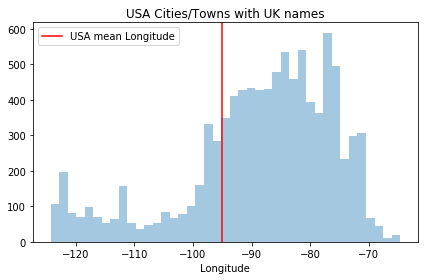

In [39]:
#sns.distplot(df_us_long['Longitude'], bins=10, kde=False)
sns.distplot(df_us_gb_long['Longitude'], kde=False)
plt.axvline(-95, color='red', label='USA mean Longitude')
#plt.axvline(df_us_gb_long['Longitude'].mean(), label='Sample mean')
plt.legend()
plt.title('USA Cities/Towns with UK names')
plt.savefig('fig1.png', dpi=200)
plt.tight_layout()

In [26]:
from scipy.stats import anderson
data = df_us_gb_long['Longitude']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=203.455
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [27]:
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat=%.3f, p=%f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.922, p=0.000000
Probably not Gaussian


/home/gus/.local/share/virtualenvs/bci_desafio_data_analytics-4PuCjHLk/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
stats.ttest_1samp(df_us_gb_long['Longitude'], -95)

Ttest_1sampResult(statistic=48.779729026087786, pvalue=0.0)